# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = base_url + "appid=" + weather_api_key + "&units=" + units + "&q="



In [20]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=cf1c9926e5f897d5f0a907848f1a6a01&units=imperial&q=


In [22]:
city_name = []
max_temps = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []
date = []


print("Beginning Data Retrieval")
print("----------------------------")
x=0
for city in cities: 
    try: 
        city_data = requests.get(query_url + city).json()
        x=x+1
        print(f"Processing Record {x} | {city}")
        city_name.append(city_data["name"])
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        max_temps.append(city_data["main"]["temp_max"])
        humidity.append(city_data["main"]["humidity"])
        cloudiness.append(city_data["clouds"]["all"])
        wind_speed.append(city_data["wind"]["speed"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        #print(city_name)
    except KeyError: 
        print("city name not found")
        
        #print(city_name)
print("------------------------------")        
print("Data retrieval complete")
        
#try to use if statement to limit the amount that is searching--group of cities in a set, 20 at a time  
#try to use enumerate or iterrows

Beginning Data Retrieval
----------------------------
Processing Record 1 | talnakh
Processing Record 2 | bilma
Processing Record 3 | new norfolk
Processing Record 4 | busselton
Processing Record 5 | aykhal
Processing Record 6 | cabo san lucas
Processing Record 7 | vardo
Processing Record 8 | nikolskoye
Processing Record 9 | mataura
Processing Record 10 | jarjis
city name not found
Processing Record 11 | kawalu
Processing Record 12 | ushuaia
Processing Record 13 | peterhead
Processing Record 14 | bukachacha
Processing Record 15 | rikitea
Processing Record 16 | punta arenas
Processing Record 17 | taolanaro
city name not found
Processing Record 18 | vaitupu
city name not found
Processing Record 19 | hobart
Processing Record 20 | atuona
Processing Record 21 | provideniya
Processing Record 22 | salalah
Processing Record 23 | labuhan
Processing Record 24 | tuktoyaktuk
Processing Record 25 | komsomolskiy
Processing Record 26 | saint-philippe
Processing Record 27 | bilibino
Processing Record 

Processing Record 236 | sao joao da barra
Processing Record 237 | fuling
Processing Record 238 | alice springs
Processing Record 239 | grand gaube
Processing Record 240 | lermontovka
Processing Record 241 | opuwo
Processing Record 242 | bulanash
Processing Record 243 | dongying
Processing Record 244 | awbari
Processing Record 245 | cayenne
Processing Record 246 | yarmouth
Processing Record 247 | russell
Processing Record 248 | guerrero negro
Processing Record 249 | tuensang
Processing Record 250 | pilar
Processing Record 251 | oksfjord
Processing Record 252 | katsuura
Processing Record 253 | narsaq
Processing Record 254 | troitskoye
Processing Record 255 | milyutinskaya
Processing Record 256 | moose factory
Processing Record 257 | nata
Processing Record 258 | mamou
Processing Record 259 | idritsa
Processing Record 260 | quatre cocos
Processing Record 261 | enshi
Processing Record 262 | oistins
Processing Record 263 | bambous virieux
Processing Record 264 | leshukonskoye
Processing Reco

Processing Record 469 | tuggurt
city name not found
Processing Record 470 | kyren
Processing Record 471 | bijie
Processing Record 472 | sisimiut
Processing Record 473 | lucapa
Processing Record 474 | manzhouli
Processing Record 475 | kadykchan
city name not found
Processing Record 476 | cascais
Processing Record 477 | rincon
Processing Record 478 | hue
Processing Record 479 | victoria point
Processing Record 480 | izumo
Processing Record 481 | saint george
Processing Record 482 | umzimvubu
city name not found
Processing Record 483 | oga
Processing Record 484 | portland
Processing Record 485 | ballina
Processing Record 486 | pitkyaranta
Processing Record 487 | howard springs
Processing Record 488 | pyaozerskiy
Processing Record 489 | mehamn
Processing Record 490 | vostok
Processing Record 491 | ailigandi
Processing Record 492 | ust-omchug
Processing Record 493 | bulawayo
Processing Record 494 | brandon
Processing Record 495 | pochutla
Processing Record 496 | boden
Processing Record 497 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
#make a dataframe
##add lat_lngs
city_data_df = pd.DataFrame({"City Name": city_name, 
                             "Lat": lat,
                             "Lng": lng,
                              "Max Temp": max_temps, 
                              "Humidity": humidity, 
                              "Cloudiness": cloudiness,
                              "Wind Speed": wind_speed,
                              "Country": country,
                              "Date": date})
city_data_df.head(10)

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talnakh,69.49,88.40,23.00,100,90,11.18,RU,1602689208
1,Bilma,18.69,12.92,103.10,8,0,7.67,NE,1602689209
2,New Norfolk,-42.78,147.06,55.40,62,40,14.99,AU,1602689209
3,Busselton,-33.65,115.33,57.00,68,0,12.91,AU,1602689209
4,Aykhal,66.00,111.50,17.60,92,75,6.71,RU,1602689209
5,Cabo San Lucas,22.89,-109.91,82.40,78,40,11.41,MX,1602689107
6,Vardø,70.37,31.11,37.40,86,40,21.92,NO,1602689210
7,Nikolskoye,59.70,30.79,48.20,70,90,13.42,RU,1602689210
8,Mataura,-46.19,168.86,35.01,91,90,1.99,NZ,1602689009
9,Kawalu,-7.38,108.21,74.01,89,94,2.80,ID,1602689210


In [53]:
#export to .csv
city_data_df.to_csv("city_data.csv")
city_data_df.to_csv("city_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
#  Get the indices of cities that have humidity over 100%.
#city_data_df.loc[city_data_df["Humidity"]>80]

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talnakh,69.49,88.40,23.00,100,90,11.18,RU,1602689208
4,Aykhal,66.00,111.50,17.60,92,75,6.71,RU,1602689209
6,Vardø,70.37,31.11,37.40,86,40,21.92,NO,1602689210
8,Mataura,-46.19,168.86,35.01,91,90,1.99,NZ,1602689009
9,Kawalu,-7.38,108.21,74.01,89,94,2.80,ID,1602689210
...,...,...,...,...,...,...,...,...,...
558,Maniitsoq,65.42,-52.90,35.17,87,99,10.65,GL,1602689305
564,Namatanai,-3.67,152.43,77.41,81,100,2.37,PG,1602689306
568,Fort Frances,48.60,-93.40,41.00,86,90,11.41,CA,1602689307
569,Muriwai Beach,-36.82,174.45,54.00,95,63,11.92,NZ,1602689307


In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# clean_df = city_data_df[city_data_df["Humidity"]<=80]
# clean_df

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bilma,18.69,12.92,103.10,8,0,7.67,NE,1602689209
2,New Norfolk,-42.78,147.06,55.40,62,40,14.99,AU,1602689209
3,Busselton,-33.65,115.33,57.00,68,0,12.91,AU,1602689209
5,Cabo San Lucas,22.89,-109.91,82.40,78,40,11.41,MX,1602689107
7,Nikolskoye,59.70,30.79,48.20,70,90,13.42,RU,1602689210
...,...,...,...,...,...,...,...,...,...
570,Kopavogur,64.11,-21.91,50.00,76,75,21.92,IS,1602689307
572,Jardim,-21.48,-56.14,100.38,28,39,6.87,BR,1602689307
573,Tiarei,-17.53,-149.33,77.00,73,20,11.41,PF,1602689308
574,Hirara,24.80,125.28,79.34,74,98,17.07,JP,1602689308


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

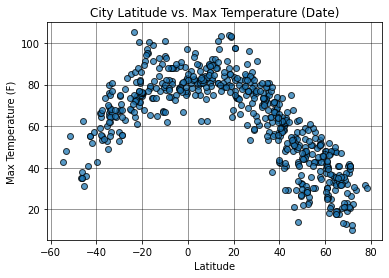

In [50]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("latitudeVStemp.png")
plt.show()
#use images in ReadMe on GitHub, choose at least all latitude plots, and some others 

## Latitude vs. Humidity Plot

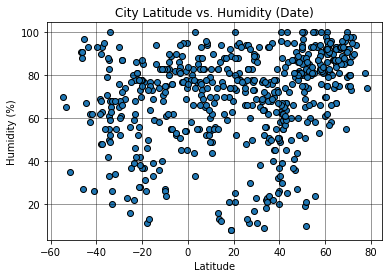

In [56]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("ImagelatitudeVShumidity.png")
plt.show()
plt.show()

## Latitude vs. Cloudiness Plot

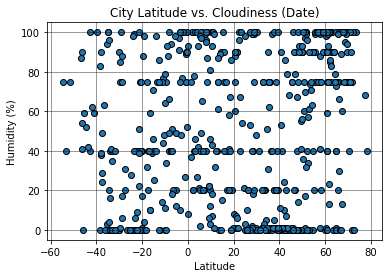

In [60]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/latitudeVScloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

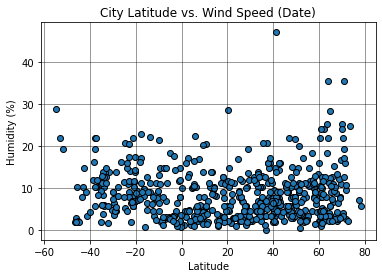

In [59]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/latitudeVSwindspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression